In [79]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [12]:
df = pd.read_csv("34.csv", index_col=None)
df.columns = ["Stock","T-t","OptVal"]

In [51]:
A = [[1,2,3,4,5],[1,2,3,4,5]]
B = [[1,2,3,4,5],[1,2,3,4,5]]
Ap = np.log(A)
Bp = np.log(B)
Ap/Bp

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([[nan,  1.,  1.,  1.,  1.],
       [nan,  1.,  1.,  1.,  1.]])

In [53]:
N

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99981962, 0.99986375, 0.99989738, ..., 1.        , 1.        ,
        1.        ],
       [0.99980052, 0.9998487 , 0.99988558, ..., 1.        , 1.        ,
        1.        ],
       [0.99978008, 0.99983254, 0.99987285, ..., 1.        , 1.        ,
        1.        ]])

In [92]:
from scipy.stats import norm

N = norm.cdf
X = 25
r = 0.03
sig = 0.2

def h(S, T_t) :
    return (np.log(S/X)+(r+0.5*(sig**2))*T_t)/(sig*np.sqrt(T_t))

S = np.arange(15, 35, 0.25)
T_t = np.arange(1/260, 0.5, 1/260)
S, T_t  = np.meshgrid(S, T_t)
h = h(S,T_t)
OptVal = N(h)*S - N(h-sig*np.sqrt(T_t))*X*np.exp(-1*r*T_t)
OptVal

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        9.25288445e+000, 9.50288445e+000, 9.75288445e+000],
       [1.63646421e-188, 9.23720106e-177, 1.41494784e-165, ...,
        9.25576857e+000, 9.50576857e+000, 9.75576857e+000],
       [7.28376964e-127, 5.07725717e-119, 1.48403313e-111, ...,
        9.25865235e+000, 9.50865235e+000, 9.75865235e+000],
       ...,
       [1.28549542e-004, 2.07260659e-004, 3.27541981e-004, ...,
        9.62621330e+000, 9.87444085e+000, 1.01229081e+001],
       [1.36901178e-004, 2.19982788e-004, 3.46531350e-004, ...,
        9.62942259e+000, 9.87760919e+000, 1.01260396e+001],
       [1.45664511e-004, 2.33288271e-004, 3.66329462e-004, ...,
        9.63263711e+000, 9.88078245e+000, 1.01291756e+001]])

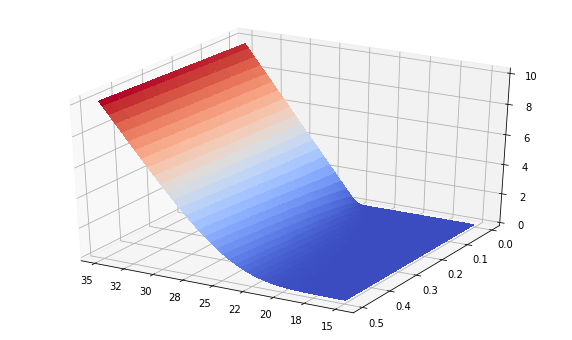

In [94]:
from matplotlib import cm
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(S, T_t, OptVal, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.view_init(30, 120)
plt.show()

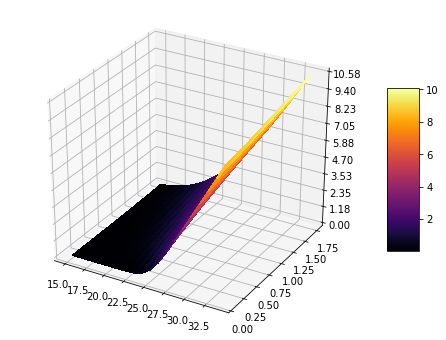

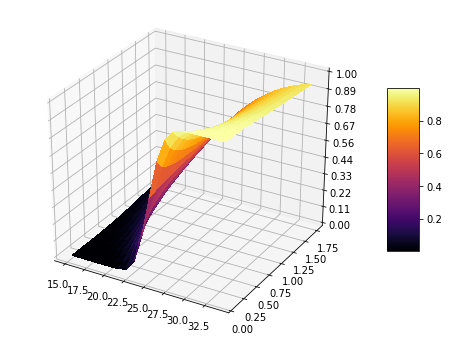

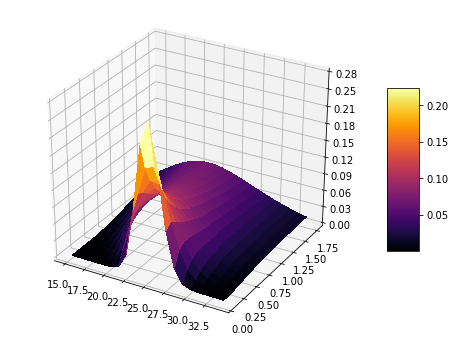

In [104]:
import numpy as np
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from scipy.stats import norm

def call_p(s,t):
    r = 0.03
    sig = 0.2
    x =25
    pv = exp(-r*t)
    h = np.log(s/(x*pv))/(sig*(t**(1/2)))+(1/2)*sig*t**(1/2)
    Nh = norm.cdf(h)
    hmin = h-sig*t**(1/2)
    Nhmin = norm.cdf(hmin)
    
    return (Nh*s-x*pv*Nhmin)


def delta(s,t):
    r = 0.03
    sig = 0.2
    x =25
    pv = exp(-r*t)
    h = np.log(s/(x*pv))/(sig*(t**(1/2)))+(1/2)*sig*t**(1/2)
    Nh = norm.cdf(h)
    #hmin = h-sig*t**(1/2)
    #Nhmin = norm.cdf(hmin)
    #call = (Nh*s-x*pv*Nhmin)
    return Nh


def gamma(s,t):
    r = 0.03
    sig = 0.2
    x =25
    pv = exp(-r*t)
    h = np.log(s/(x*pv))/(sig*(t**(1/2)))+(1/2)*sig*t**(1/2)
    Nh = norm.cdf(h)
    hmin = h-sig*t**(1/2)
    Nhmin = norm.cdf(hmin)
    call = (Nh*s-x*pv*Nhmin)
    return norm.pdf(h,0,1)/(s*sig*t**(1/2))

s = arange(15,35,1)
t = arange(1/12,22/12,1/12)
S,T = meshgrid(s, t) # grid of point
C = call_p(S, T) # evaluation of the function on the grid

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(S, T, C, rstride=1, cstride=1, cmap=cm.inferno,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#ax.xlabel('Stock Price')

fig.colorbar(surf, shrink=0.5, aspect=5)



D = delta(S, T) # evaluation of the function on the grid

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(S, T, D, rstride=1, cstride=1, cmap=cm.inferno,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#ax.xlabel('Stock Price')

fig.colorbar(surf, shrink=0.5, aspect=5)


G = gamma(S, T) # evaluation of the function on the grid

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(S, T, G, rstride=1, cstride=1, cmap=cm.inferno,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#ax.xlabel('Stock Price')

fig.colorbar(surf, shrink=0.5, aspect=5)
